In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings("ignore")

breast_cancer = load_breast_cancer()

In [2]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [3]:
from sklearn.preprocessing import MinMaxScaler

data = MinMaxScaler().fit_transform(breast_cancer.data)

In [4]:
from sklearn.model_selection import train_test_split

train, test, labels_train, labels_test = train_test_split(data, breast_cancer.target,
                                                          train_size=0.60, test_size=0.40,
                                                          random_state=2022)

In [5]:
categorical_features = np.argwhere(
    np.array([len(set(breast_cancer.data[:, x])) for x in range(breast_cancer.data.shape[1])]) <= 10).flatten()

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import keras
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense, Dropout
from keras.utils import to_categorical

model = RandomForestClassifier(random_state=2022)
# model = AdaBoostClassifier(random_state=2022)
# model = GradientBoostingClassifier(random_state=2022)
# labels_train2 = to_categorical(labels_train, 2)
# labels_test2 = to_categorical(labels_test, 2)
# model = Sequential()
# model.add(Dense(32, activation='relu', input_dim=30))
# model.add(Dropout(0.2))
# model.add(Dense(2, activation='softmax'))
# model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
# model.fit(train, labels_train2, batch_size=32, epochs=50, validation_data=(test, labels_test2))
model.fit(train, labels_train)


Using TensorFlow backend.


RandomForestClassifier(random_state=2022)

In [7]:
pred_origin = model.predict_proba(test)
pred_origin[:5]

array([[0.06, 0.94],
       [0.  , 1.  ],
       [0.24, 0.76],
       [0.  , 1.  ],
       [0.08, 0.92]])

In [8]:
test[25]

array([0.26499124, 0.29387893, 0.24904982, 0.14655355, 0.28256748,
       0.06987301, 0.00435801, 0.0145328 , 0.32171717, 0.18091828,
       0.05808437, 0.21875   , 0.04542242, 0.02922686, 0.15875174,
       0.04323009, 0.00469697, 0.05538928, 0.25085833, 0.03870072,
       0.19815012, 0.29477612, 0.17505852, 0.09312328, 0.2154791 ,
       0.03778948, 0.00445607, 0.03014433, 0.1852947 , 0.06080283])

In [9]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
np.max(test[:,8])

1.0

In [11]:
from sklearn.preprocessing import MinMaxScaler

feature_importances = MinMaxScaler().fit_transform(model.feature_importances_.reshape(-1, 1))
feature_importances = feature_importances.flatten()
feature_importances

array([0.12470874, 0.07116183, 0.28643857, 0.38800249, 0.02072756,
       0.08186399, 0.2044496 , 0.26559537, 0.00198716, 0.02140795,
       0.05370568, 0.01103255, 0.05989733, 0.27335667, 0.01225034,
       0.        , 0.01472156, 0.01552349, 0.01245002, 0.01000469,
       0.46597686, 0.07294899, 1.        , 0.81142486, 0.05919402,
       0.06985737, 0.09968505, 0.55994064, 0.03616283, 0.02445665])

In [12]:
import sys
sys.path.append('..')
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=breast_cancer.feature_names,
                                                   categorical_features=categorical_features, verbose=False,
                                                   mode='classification', random_state=2022)

0.9999277884820139
[('0.22 < mean texture <= 0.31', 1.6404982063369304), ('0.17 < worst perimeter <= 0.24', 1.4560554933318317), ('0.08 < worst area <= 0.12', 1.4454258552432995), ('mean concave points <= 0.10', 1.4437636584655027), ('worst concave points <= 0.23', 1.3656109433316865), ('0.12 < mean area <= 0.17', 1.3000464383901333), ('0.18 < worst radius <= 0.25', 0.7594422775354936), ('worst smoothness <= 0.31', 0.7126390389009399), ('concavity error <= 0.04', 0.5212487425163538), ('compactness error <= 0.09', -0.5120535476241763), ('worst symmetry <= 0.19', 0.5018893331901971), ('0.18 < mean fractal dimension <= 0.25', -0.41991062071716473), ('concave points error <= 0.15', -0.377581650555744), ('mean smoothness <= 0.31', -0.368648586932971), ('0.25 < worst texture <= 0.36', 0.3309747469051409), ('mean compactness <= 0.15', -0.2934644978028476), ('0.02 < area error <= 0.03', 0.27805696950812836), ('0.04 < radius error <= 0.07', -0.24789691444825035), ('0.28 < mean symmetry <= 0.37'

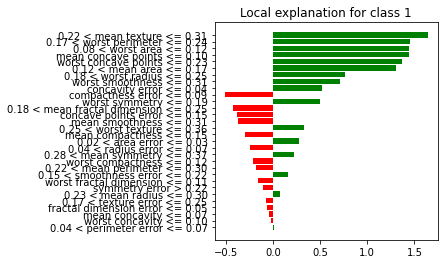

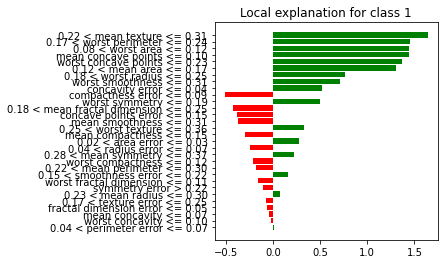

In [13]:
exp = explainer.explain_instance(test[25], model.predict_proba,
                                 num_features=30, labels=(0, 1),
                                 # model_regressor='ensemble'
                                 )
print(exp.local_pred[1])
exp.as_pyplot_figure(label=1)

In [14]:
import tqdm as td
from sklearn.metrics.pairwise import cosine_similarity
pred_lime = []
cos_sim_list = []
for k in td.tqdm(test):
    exp = explainer.explain_instance(k, model.predict_proba, num_features=30, labels=(0, 1)
                                     # ,model_regressor='ensemble'
                                     , num_samples=5000
                                     , model_regressor='DecisionTreeClassifier'
                                     )
    # print(exp.local_pred)
    pred_lime.append([exp.local_pred[0], exp.local_pred[1]])
    coef_list = np.zeros(len(breast_cancer.feature_names))
    # print(len(exp.local_exp))
    for i in exp.local_exp:
        # print(exp.local_exp[i])
        for j in exp.local_exp[i]:
            if isinstance(j[1], np.ndarray):
                coef_list[j[0]] += j[1].tolist()[0]
            else:
                coef_list[j[0]] += j[1]
    coef_list = coef_list / len(exp.local_exp)
    coef_list = MinMaxScaler().fit_transform(coef_list.reshape(-1, 1)).flatten()
    # print(coef_list)
    importance_coef = []
    importance_coef.append(feature_importances.tolist())
    importance_coef.append(coef_list.tolist())
    # print(importance_coef)
    # print('cos_sim:', cosine_similarity(importance_coef)[0][1])
    cos_sim_list.append(cosine_similarity(importance_coef)[0][1])
print(np.sum(cos_sim_list) / len(cos_sim_list))

100%|██████████| 228/228 [03:21<00:00,  1.13it/s]

0.5948695305456206


In [15]:
pred_lime = np.argmax(pred_lime, axis=1)
pred_lime[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [16]:
from sklearn.metrics import classification_report

print('\nClassification Report:\n', classification_report(labels_test, np.round(pred_origin[:,1]).flatten(), digits=4))


Classification Report:
               precision    recall  f1-score   support

           0     0.9398    0.8966    0.9176        87
           1     0.9379    0.9645    0.9510       141

    accuracy                         0.9386       228
   macro avg     0.9388    0.9305    0.9343       228
weighted avg     0.9386    0.9386    0.9383       228



In [17]:
print('\nClassification Report:\n', classification_report(labels_test, pred_lime, digits=4))


Classification Report:
               precision    recall  f1-score   support

           0     0.9398    0.8966    0.9176        87
           1     0.9379    0.9645    0.9510       141

    accuracy                         0.9386       228
   macro avg     0.9388    0.9305    0.9343       228
weighted avg     0.9386    0.9386    0.9383       228



In [18]:

print('\nClassification Report:\n', classification_report(np.round(pred_origin[:,1]).flatten(), pred_lime, digits=4))


Classification Report:
               precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000        83
         1.0     1.0000    1.0000    1.0000       145

    accuracy                         1.0000       228
   macro avg     1.0000    1.0000    1.0000       228
weighted avg     1.0000    1.0000    1.0000       228

